# Wykrywanie Halucynacji

<img src="https://live.staticflickr.com/65535/54208132682_73767c3560_b.jpg" alt="Embedded Photo" width="500">

*Obraz wygenerowany przy użyciu modelu DALL-E.*

## Wstęp

Modele językowe pomagają nam w codziennych zadaniach, takich jak poprawianie tekstów, pisanie kodu czy odpowiadanie na pytania. 
Są one również coraz częściej wykorzystywane w takich dziedzinach jak medycyna czy edukacja.

Jednak skąd możemy wiedzieć, czy wygenerowane przez nie odpowiedzi są poprawne? Modele językowe nie zawsze posiadają pełną wiedzę na zadany temat, a mimo to mogą formułować odpowiedzi, które brzmią wiarygodnie, lecz w rzeczywistości wprowadzają w błąd. Takie niepoprawne odpowiedzi nazywamy halucynacjami.

## Zadanie

W tym zadaniu zmierzysz się z wykrywaniem halucynacji w odpowiedziach na pytania faktograficzne generowane przez duże modele językowe (LLM).
Przeanalizujesz zbiór danych, który pomoże w ocenie, czy odpowiedzi generowane przez model językowy są faktycznie poprawne, czy zawierają halucynacje.

Każdy przykład w zbiorze danych zawiera:

- **Pytanie** np. "Jaka jest główna odpowiedzialność Departamentu Obrony USA?"
- **Odpowiedź modelu językowego** np. "Główną odpowiedzialnością jest obrona kraju."
- **Tokeny** związane z generacją odpowiedzi.
- **Cztery alternatywne odpowiedzi** wygenerowane z przez ten sam model z większą temperaturą.
- **Tokeny alternatywnych odpowiedzi** wygenerowane z przez ten sam model z większą temperaturą.
- **Prawdopodobieństwa alternatywnych odpowiedzi** wygenerowane z przez ten sam model z większą temperaturą.
- **Etykietę (`is_correct`)** wskazującą, czy główna odpowiedź jest poprawna według zaufanego źródła.


Przykład:
```json
[
    {
        "question_id": 34,
        "question": "What is the name of the low-cost carrier that operates as a wholly owned subsidiary of Singapore Airlines?",
        "answer": "Scoot is the low-cost carrier that operates as a wholly owned subsidiary of Singapore Airlines.",
        "tokens": [" Sco", "ot", " is", ..., " Airlines", ".", "\n"],
        "supporting_answers": [
            "As a wholly owned subsidiary of Singapore Airlines, <answer> Scoot </answer> stands as a low-cost carrier that revolutionized air travel in the region.",
            "Scoot, a subsidiary of <answer> Singapore Airlines </answer> , is the low-cost carrier that operates under the same brand.",
            "<answer> Scoot </answer> is the low-cost carrier that operates as a wholly owned subsidiary of Singapore Airlines.",
            "Singapore Airlines operates a low-cost subsidiary named <answer> Scoot </answer> , offering affordable and efficient air travel options to passengers."
        ],
        "supporting_tokens": [
            [" As", " a", ..., ".", "<answer>"],
            [" Sco", "ot", ..., " brand", ".", "\n"],
            ["<answer>", " Sco", ..., ".", "\n"],
            [" Singapore", " Airlines", ..., ".", "\n"]
        ],
        "supporting_probabilities": [
            [0.0029233775567263365, 0.8621460795402527, ..., 0.018515007570385933],
            [0.42073577642440796, 0.9999748468399048, ..., 0.9166142344474792],
            [0.3258324861526489, 0.9969879984855652, ..., 0.921079695224762],
            [0.11142394691705704, 0.960810661315918, ..., 0.9557166695594788]
        ],
        "is_correct": true
    },
    .
    .
    .
]
```

### Dane
Dane dostępne dla Ciebie w tym zadaniu to:

* `train.json` - zbiór danych zawierający 2967 pytań oraz odpowiedzi.
* `valid.json` - 990 dodatkowych pytań.


### Kryterium Oceny

ROC AUC (ang. *Receiver Operating Characteristic Area Under Curve*) to miara jakości klasyfikatora binarnego. Pokazuje zdolność modelu do odróżniania między dwiema klasami - tutaj halucynacją (false) i poprawną odpowiedzią (true). 

- **ROC (Receiver Operating Characteristic)**: Wykres pokazujący zależność między *True Positive Rate* (czułość) a *False Positive Rate* (1-specyficzność) przy różnych progach decyzyjnych.
- **AUC (Area Under Curve)**: Pole pod wykresem ROC, które przyjmuje wartości od 0 do 1:
  - **1.0**: Model perfekcyjny.
  - **0.5**: Model losowy (brak zdolności do odróżniania klas).

Im wyższa wartość AUC, tym lepiej model radzi sobie z klasyfikacją.

Za to zadanie możesz zdobyć pomiędzy 0 a 100 punktów. Wynik będzie skalowany liniowo w zależności od wartości ROC AUC:

- **ROC AUC ≤ 0.7**: 0 punktów.
- **ROC AUC ≥ 0.82**: 100 punktów.
- **Wartości pomiędzy 0.7 a 0.82**: skalowane liniowo.

Wzór na wynik:  
$$
\text{Punkty} = 
\begin{cases} 
0 & \text{dla } \text{ROC AUC} \leq 0.7 \\
100 \times \frac{\text{ROC AUC} - 0.7}{0.82 - 0.7} & \text{dla } 0.7 < \text{ROC AUC} < 0.82 \\
100 & \text{dla } \text{ROC AUC} \geq 0.82
\end{cases}
$$


## Ograniczenia
* Twoje rozwiazanie będzie testowane na Platformie Konkursowej bez dostępu do internetu oraz w środowisku bez GPU.
* Ewaluacja Twojego finalnego rozwiązania na Platformie Konkursowej nie może trwać dłużej niż 5 minut bez GPU.
* Lista dopuszczalnych bibliotek: `xgboost`, `scikit-learn`, `numpy`, `pandas`, `matplotlib`.


## Pliki Zgłoszeniowe
Ten notebook uzupełniony o Twoje rozwiązanie (patrz funkcja `predict_hallucinations`).

## Ewaluacja
Pamiętaj, że podczas sprawdzania flaga `FINAL_EVALUATION_MODE` zostanie ustawiona na `True`.

Za to zadanie możesz zdobyć pomiędzy 0 a 100 punktów. Liczba punktów, którą zdobędziesz, będzie wyliczona na (tajnym) zbiorze testowym na Platformie Konkursowej na podstawie wyżej wspomnianego wzoru, zaokrąglona do liczby całkowitej. Jeśli Twoje rozwiązanie nie będzie spełniało powyższych kryteriów lub nie będzie wykonywać się prawidłowo, otrzymasz za zadanie 0 punktów.


# Kod Startowy
W tej sekcji inicjalizujemy środowisko poprzez zaimportowanie potrzebnych bibliotek i funkcji. Przygotowany kod ułatwi Tobie efektywne operowanie na danych i budowanie właściwego rozwiązania.

In [1]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

FINAL_EVALUATION_MODE = True  # W czasie sprawdzania twojego rozwiązania, zmienimy tą wartość na True

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from sklearn.dummy import DummyClassifier

def download_data(train=("1TGEDaxw4GKfSq0fpqSk0wRpUSc8GgZN0", "train.json"),
                  valid=("1qrr7bZk6Uct8DeC-V8Bc1qD5su56ryFd", "valid.json")):
    """Pobiera zbiór danych z Google Drive i zapisuje go w folderze 'data'."""
    import gdown
    
    # Utwórz lub zresetuj folder 'data'
    if not os.path.exists('data'):
        os.makedirs('data')
    else:
        shutil.rmtree('data')
        os.makedirs('data')

    GDRIVE_DATA = [train, valid]
    
    for file_id, file_name in GDRIVE_DATA:        
        # Pobierz plik z Google Drive i zapisz go w folderze 'data'
        url = f'https://drive.google.com/uc?id={file_id}'
        output = f'data/{file_name}'
        gdown.download(url, output, quiet=False)
        
        print(f"Downloaded: {file_name}")

# Pobierz dane tylko jeśli nie jesteś w trybie FINAL_EVALUATION_MODE
if not FINAL_EVALUATION_MODE:
    download_data()


## Ładowanie Danych
Za pomocą poniższego kodu dane zostaną wczytane i odpowiednio przygotowane.

In [2]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

def load_data(folder='data'):
    # Wczytaj dane z plików
    train_path = os.path.join(folder, 'train.json')
    valid_path = os.path.join(folder, 'valid.json')
    
    with open(train_path, 'r') as f:
        train = json.load(f)
    with open(valid_path, 'r') as f:
        valid = json.load(f)

    return train, valid

train, valid = load_data("data")

print(f"\nWszystkie przykłady treningowe: {len(train)}")
print(f"Wszystkie przykłady walidacyjne: {len(valid)}")


Wszystkie przykłady treningowe: 2967
Wszystkie przykłady walidacyjne: 990


# Modelowe Rozwiązanie

Poniższe rozwiązanie przechodzi przez cały proces uczenia maszynowego, od eksploracji danych po ewaluację modelu na zbiorze walidacyjnym.
Jako klasyfikator wykorzystano model XGBoost.
Do uzyskania dobrych wyników wymagane jest stworzenie odpowiednich cech, które pozwolą na wykrycie halucynacji w odpowiedziach modelu językowego.

Rozwiązanie zostało podzielone na poszczególne kroki:

* [1. Eksploracja danych](#1.-Eksploracja-danych)
* [2. Ekstrakcja cech](#2.-Ekstrakcja-cech)
  * [2.1 Cechy statystyczne](#2.1-Cechy-statystyczne)
  * [2.2 Cechy semantyczne](#2.2-Cechy-semantyczne)
  * [2.3 Spójność odpowiedzi alternatywnych](#2.3-Spójność-odpowiedzi-alternatywnych)
  * [2.4 Styl i struktura odpowiedzi](#2.4-Styl-i-struktura-odpowiedzi)
  * [2.5 Typ pytania](#2.5-Typ-pytania)
  * [2.6 Analiza prawdopodobieństw odpowiedzi](#2.6-Analiza-prawdopodobieństw-odpowiedzi)
* [3. Agregacja cech](#3.-Agregacja-cech)
* [4. Klasa do trenowania modelu](#4.-Klasa-do-trenowania-modelu)
* [5. Klasa do ewaluacji modelu](#5.-Klasa-do-ewaluacji-modelu)
* [6. Demo - cykl uczenia maszynowego](#6.-Demo---cykl-uczenia-maszynowego)
  * [6.1 Przygotowanie danych](#6.1-Przygotowanie-danych)
  * [6.2 Trenowanie modelu](#6.2-Trenowanie-modelu)
  * [6.3 Ewaluacja modelu na zbiorze walidacyjnym](#6.3-Ewaluacja-modelu-na-zbiorze-walidacyjnym)
* [7. (Opcjonalne) Ocena podzbiorów cech](#7.-(Opcjonalne)-Ocena-podzbiorów-cech)
* [8. Ocena rozwiązania](#8.-Ocena-rozwiązania)

In [3]:
import re
import os
import json
import pickle
import numpy as np
import datetime
import joblib
from difflib import SequenceMatcher
from collections import Counter
from typing import List, Optional

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

## 1. Eksploracja danych

Podstawową częścią każdego projektu jest eksploracja danych.
Jej celem jest zrozumienie struktury danych, ich zawartości oraz potencjalnych problemów, które mogą wystąpić podczas analizy.
W tej sekcji przeanalizujemy dane, aby zrozumieć ich strukturę i zawartość, oraz w przypadku problemów, które mogą wystąpić podczas analizy, spróbujemy je naprawić.

### 1.1 Podstawowe informacje

Zaczynamy od podstawowej analizy typowej dla eksploracji danych każdego zbioru danych (liczba próbek, liczba cech, typy cech, brakujące wartości, obejrzenie losowych próbek).

In [4]:
# Konwersja danych do pd.DataFrame
train_df = pd.DataFrame(train)
valid_df = pd.DataFrame(valid)

# (liczba przykładów, liczba cech)
print('Train DataFrame shape:', train_df.shape)
print('Valid DataFrame shape:', valid_df.shape)

Train DataFrame shape: (2967, 8)
Valid DataFrame shape: (990, 8)


In [5]:
# Sprawdzamy, czy zbiory treningowe i walidacyjne zawierają wartości null
null_value_stats = train_df.isnull().sum(axis=0)
print("Kolumny z wartościami null w zbiorze treningowym:", null_value_stats[null_value_stats != 0])
null_value_stats = valid_df.isnull().sum(axis=0)
print("Kolumny z wartościami null w zbiorze walidacyjnym:", null_value_stats[null_value_stats != 0])

Kolumny z wartościami null w zbiorze treningowym: Series([], dtype: int64)
Kolumny z wartościami null w zbiorze walidacyjnym: Series([], dtype: int64)


In [6]:
# Sprawdzamy typy danych cech
# Szczególnie trzeba uważać przy datach, aby odpowiednio je parsować
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   question_id               2967 non-null   int64 
 1   question                  2967 non-null   object
 2   answer                    2967 non-null   object
 3   tokens                    2967 non-null   object
 4   supporting_answers        2967 non-null   object
 5   supporting_tokens         2967 non-null   object
 6   supporting_probabilities  2967 non-null   object
 7   is_correct                2967 non-null   bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 165.3+ KB


In [7]:
# Przeglądamy 3 przykłady z danych treningowych
train_df.sample(3)

,question_id,question,answer,tokens,supporting_answers,supporting_tokens,supporting_probabilities,is_correct
789,7310,What type of services does Deloitte provide?,"Deloitte offers a wide range of services, incl...","[ Deloitte, offers, a, wide, range, of, ...",[<answer> Deloitte </answer> offers a wide ran...,"[[<answer>, Deloitte, </answer>, offers, a,...","[[0.017985058948397636, 0.9710698127746582, 0....",False
1095,10776,How many countries did Atento have customer re...,"As of 2016, Atento had customer relationship c...","[ As, of, , 2, 0, 1, 6, ,, Aten, to, had, ...","[As of 2016, Atento, a leading outsourcing com...","[[ As, of, , 2, 0, 1, 6, ,, Aten, to, ,, a...","[[0.47267380356788635, 0.9996330738067627, 0.9...",False
133,2664,Who called together the first meeting of the R...,"The Rotary Club was founded in Chicago, Illino...","[ The, Rotary, Club, was, founded, in, C...","[The Rotary Club, a renowned community service...","[[ The, Rotary, Club, ,, a, renowned, com...","[[0.4180641770362854, 0.6916558742523193, 0.99...",False


### 1.2 Dane statystyczne

Sprawdzamy ogólne statystyki zbioru danych odnośnie długości odpowiedzi, liczby tokenów oraz liczby alternatywnych odpowiedzi.

Wykorzystujemy do tego takie statystyki jak:
- średnia, mediana, odchylenie standardowe, minimum i maksimum długości odpowiedzi głównej
- średnia, mediana, odchylenie standardowe, minimum i maksimum długości odpowiedzi alternatywnych
- wykresy [KDE](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html) (estymujące i wygładzające dystrybucje) dla długości odpowiedzi głównej, alternatywnych oraz liczby tokenów w odpowiedziach głównych i alternatywnych
- histogram i wykres KDE dla rozkładu prawdopodobieństw odpowiedzi alternatywnych
- rozkład zmiennej docelowej (cechy `is_correct`)

In [8]:
def compute_main_answer_stats(df):
    # Statystyki dla głównych odpowiedzi
    lengths = df['answer'].apply(lambda text: len(text.split()))
    stats = {
        'Count': lengths.count(),
        'Min Length': lengths.min(),
        'Max Length': lengths.max(),
        'Mean Length': lengths.mean(),
        'Median Length': lengths.median(),
        'Std Dev': lengths.std()
    }
    return stats

def compute_supporting_answer_stats(df):
    # Statystyki dla odpowiedzi alternatywnych
    supporting_lengths = []
    for answers in df['supporting_answers']:
        # Each cell contains a list of answers
        for ans in answers:
            supporting_lengths.append(len(ans.split()))
    supporting_lengths = np.array(supporting_lengths)
    stats = {
        'Count': supporting_lengths.size,
        'Min Length': supporting_lengths.min() if supporting_lengths.size else None,
        'Max Length': supporting_lengths.max() if supporting_lengths.size else None,
        'Mean Length': supporting_lengths.mean() if supporting_lengths.size else None,
        'Median Length': np.median(supporting_lengths) if supporting_lengths.size else None,
        'Std Dev': supporting_lengths.std() if supporting_lengths.size else None
    }
    return stats

# Porównanie statystyk dla głównych odpowiedzi
main_train_stats = compute_main_answer_stats(train_df)
main_valid_stats = compute_main_answer_stats(valid_df)
main_stats_df = pd.DataFrame([main_train_stats, main_valid_stats], index=["Train Main Answer", "Valid Main Answer"])

# Porównanie statystyk dla odpowiedzi alternatywnych
support_train_stats = compute_supporting_answer_stats(train_df)
support_valid_stats = compute_supporting_answer_stats(valid_df)
support_stats_df = pd.DataFrame([support_train_stats, support_valid_stats], index=["Train Supporting Answers", "Valid Supporting Answers"])

print("=== Porównanie statystyk głównych odpowiedzi ===")
display(main_stats_df)
print("\n=== Porównanie statystyk odpowiedzi alternatywnych ===")
display(support_stats_df)

=== Porównanie statystyk głównych odpowiedzi ===


,Count,Min Length,Max Length,Mean Length,Median Length,Std Dev
Train Main Answer,2967,5,66,19.437816,19.0,4.232149
Valid Main Answer,990,9,39,19.456566,19.0,4.238066



=== Porównanie statystyk odpowiedzi alternatywnych ===


,Count,Min Length,Max Length,Mean Length,Median Length,Std Dev
Train Supporting Answers,11868,1,54,20.340158,20.0,4.303119
Valid Supporting Answers,3960,7,49,20.342424,20.0,4.324749


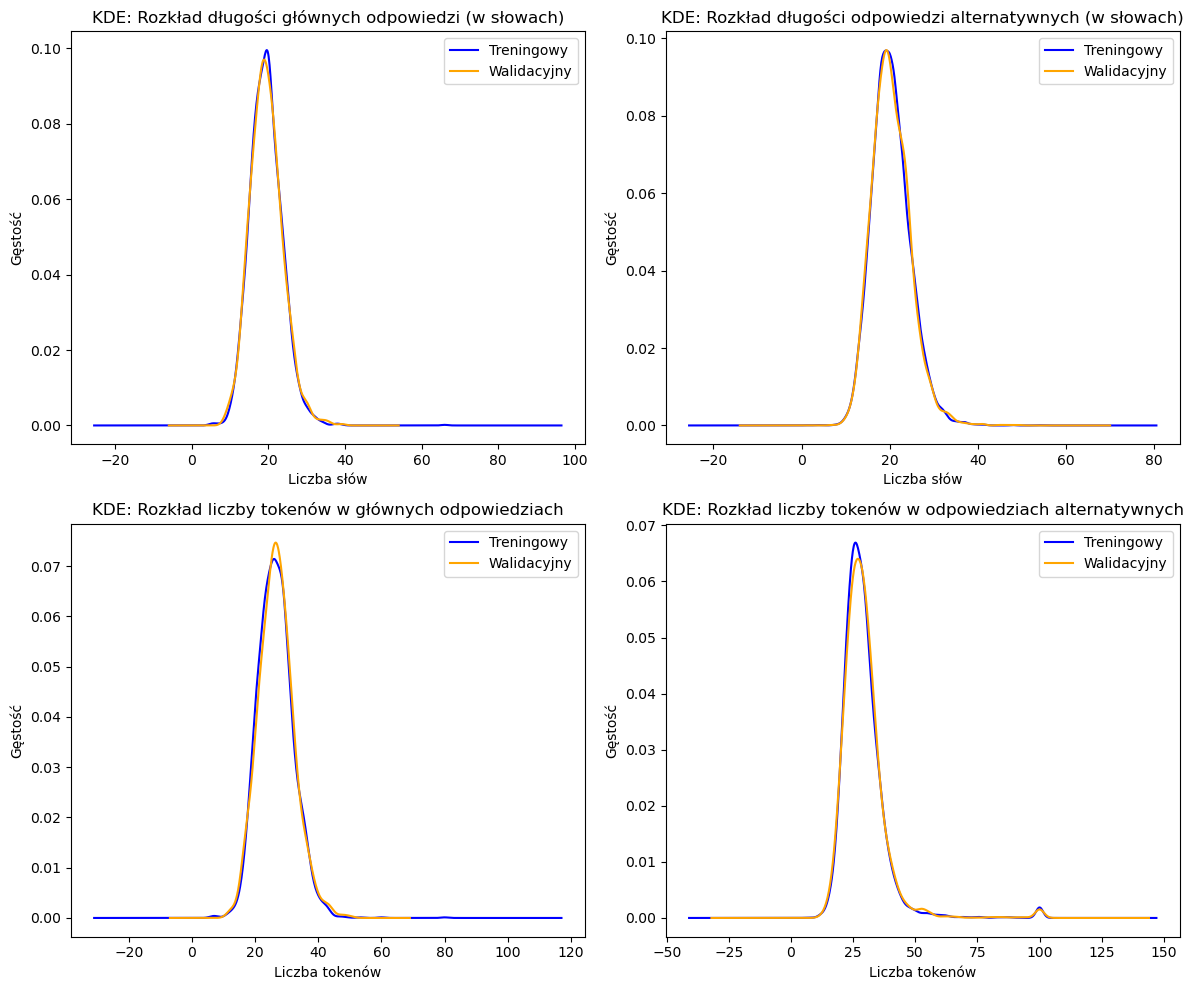

In [21]:

# Obliczamy liczbę tokenów w głównych odpowiedziach
train_main_token_counts = train_df['tokens'].str.len()
valid_main_token_counts = valid_df['tokens'].str.len()

# Obliczamy liczbę tokenów w odpowiedziach wspierających (spłaszczamy listy)
train_support_token_counts = [len(token_list) for sample in train_df['supporting_tokens'] for token_list in sample]
valid_support_token_counts = [len(token_list) for sample in valid_df['supporting_tokens'] for token_list in sample]

# Obliczamy długość głównych odpowiedzi (w słowach)
train_main_lengths = train_df['answer'].str.split().str.len()
valid_main_lengths = valid_df['answer'].str.split().str.len()

# Obliczamy długość odpowiedzi alternatywnych (w słowach) (spłaszczamy listy)
train_support_lengths = [len(ans.split()) for sample in train_df['supporting_answers'] for ans in sample]
valid_support_lengths = [len(ans.split()) for sample in valid_df['supporting_answers'] for ans in sample]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Wykres KDE: liczba tokenów w głównych odpowiedziach (dolny lewy wykres)
train_main_token_counts.plot(kind='kde', ax=axes[1, 0], label='Treningowy', color='blue')
valid_main_token_counts.plot(kind='kde', ax=axes[1, 0], label='Walidacyjny', color='orange')
axes[1, 0].set(title="KDE: Rozkład liczby tokenów w głównych odpowiedziach",
               xlabel="Liczba tokenów", ylabel="Gęstość")
axes[1, 0].legend()

# Wykres KDE: liczba tokenów w odpowiedziach wspierających (dolny prawy wykres)
pd.Series(train_support_token_counts).plot(kind='kde', ax=axes[1, 1], label='Treningowy', color='blue')
pd.Series(valid_support_token_counts).plot(kind='kde', ax=axes[1, 1], label='Walidacyjny', color='orange')
axes[1, 1].set(title="KDE: Rozkład liczby tokenów w odpowiedziach alternatywnych",
               xlabel="Liczba tokenów", ylabel="Gęstość")
axes[1, 1].legend()

# Wykres KDE: długość głównych odpowiedzi (w słowach) (górny lewy wykres)
train_main_lengths.plot(kind='kde', ax=axes[0, 0], label='Treningowy', color='blue')
valid_main_lengths.plot(kind='kde', ax=axes[0, 0], label='Walidacyjny', color='orange')
axes[0, 0].set(title="KDE: Rozkład długości głównych odpowiedzi (w słowach)",
               xlabel="Liczba słów", ylabel="Gęstość")
axes[0, 0].legend()

# Wykres KDE: długość odpowiedzi wspierających (w słowach) (górny prawy wykres)
pd.Series(train_support_lengths).plot(kind='kde', ax=axes[0, 1], label='Treningowy', color='blue')
pd.Series(valid_support_lengths).plot(kind='kde', ax=axes[0, 1], label='Walidacyjny', color='orange')
axes[0, 1].set(title="KDE: Rozkład długości odpowiedzi alternatywnych (w słowach)",
               xlabel="Liczba słów", ylabel="Gęstość")
axes[0, 1].legend()

plt.tight_layout()
plt.show()

Z informacji statystycznych można zauważyć, że dane ze zbioru treningowego mają bardzo zbliżone wartości do wartości ze zbioru walidacyjnego. Pod względem statystycznym są one do siebie bardzo podobne co jest porządane do trenowania modelu uczenia maszynowego (chcemy, aby dane walidacyjne pochodziły z tej samej dystrybucji co dane treningowe).

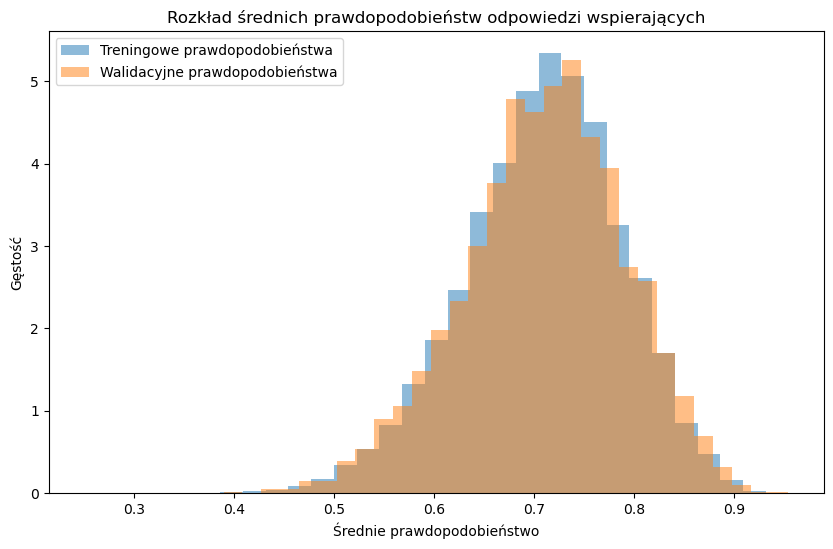

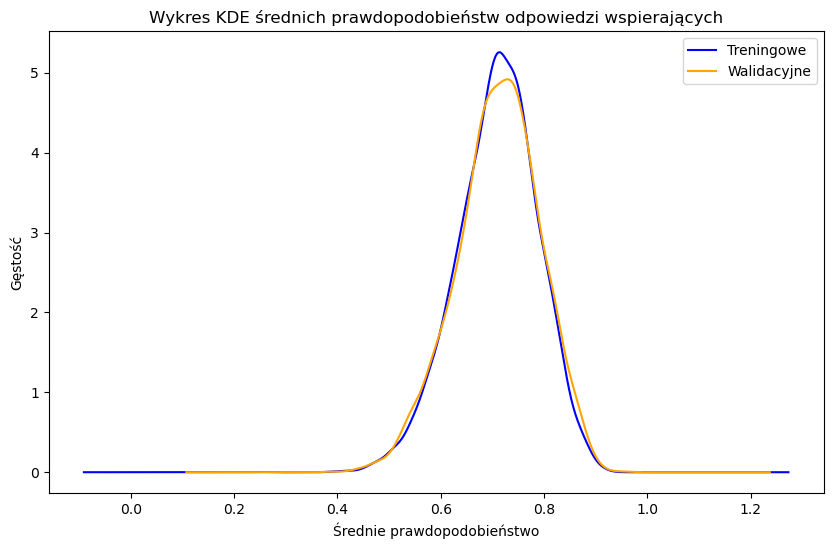

In [10]:
# Wyodrębnianie średnich prawdopodobieństw odpowiedzi wspierających dla zbioru treningowego
train_support_avg = []
for probs_lists in train_df['supporting_probabilities']:
    for prob_list in probs_lists:
        train_support_avg.append(np.mean(prob_list))

# Analogicznie, wyodrębnianie średnich prawdopodobieństw dla zbioru walidacyjnego
valid_support_avg = []
for probs_lists in valid_df['supporting_probabilities']:
    for prob_list in probs_lists:
        valid_support_avg.append(np.mean(prob_list))

# Rysowanie histogramów dla zbioru treningowego i walidacyjnego prawdopodobieństw odpowiedzi wspierających
plt.figure(figsize=(10, 6))
plt.hist(train_support_avg, bins=30, alpha=0.5, density=True, label='Treningowe prawdopodobieństwa')
plt.hist(valid_support_avg, bins=30, alpha=0.5, density=True, label='Walidacyjne prawdopodobieństwa')
plt.xlabel('Średnie prawdopodobieństwo')
plt.ylabel('Gęstość')
plt.title('Rozkład średnich prawdopodobieństw odpowiedzi wspierających')
plt.legend()
plt.show()

# Rysowanie wykresów KDE przy użyciu serii Pandas
plt.figure(figsize=(10, 6))
pd.Series(train_support_avg).plot(kind='kde', label='Treningowe', color='blue')
pd.Series(valid_support_avg).plot(kind='kde', label='Walidacyjne', color='orange')
plt.xlabel('Średnie prawdopodobieństwo')
plt.ylabel('Gęstość')
plt.title('Wykres KDE średnich prawdopodobieństw odpowiedzi wspierających')
plt.legend()
plt.show()

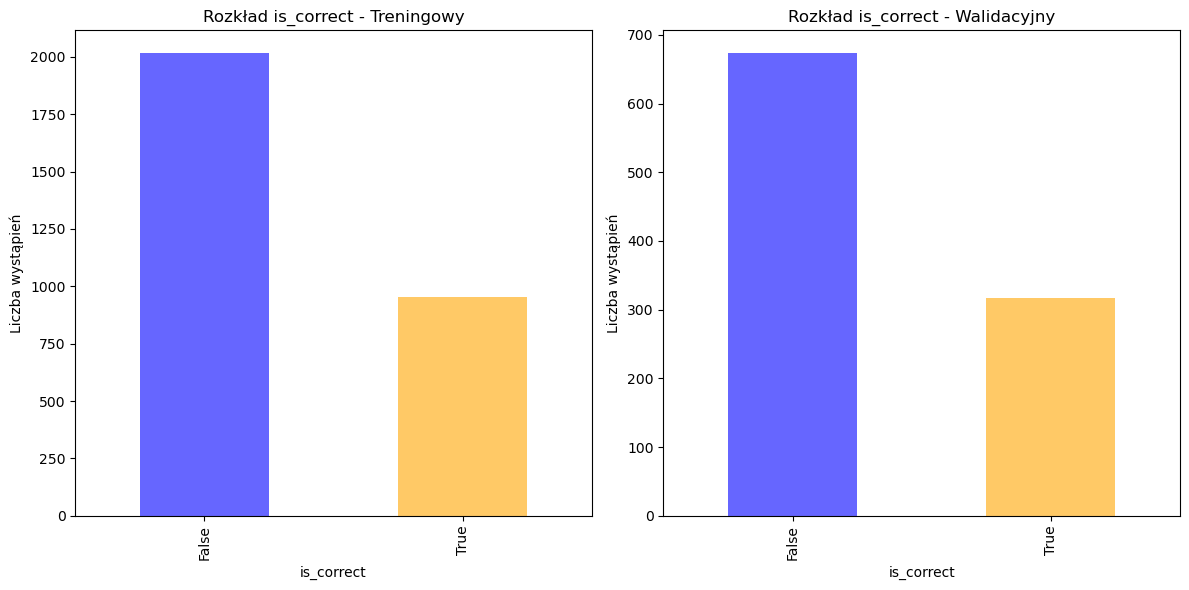

In [17]:
# Obliczenia rozkładu zmiennej is_correct dla zbioru treningowego
train_counts = train_df['is_correct'].value_counts()
# Obliczenia rozkładu zmiennej is_correct dla zbioru walidacyjnego
valid_counts = valid_df['is_correct'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

train_counts.plot(kind='bar', ax=axes[0], color=['blue', 'orange'], alpha=0.6)
axes[0].set_title('Rozkład is_correct - Treningowy')
axes[0].set_xlabel('is_correct')
axes[0].set_ylabel('Liczba wystąpień')

valid_counts.plot(kind='bar', ax=axes[1], color=['blue', 'orange'], alpha=0.6)
axes[1].set_title('Rozkład is_correct - Walidacyjny')
axes[1].set_xlabel('is_correct')
axes[1].set_ylabel('Liczba wystąpień')

plt.tight_layout()
plt.show()

Rozkłady zmiennej docelowej są bardzo zbliżone dla siebie dla zbioru treningowego i testowego, co jest dobrą wiadomością, ponieważ chcemy, aby oba zbiory pochodziły z tej samej dystrybucji.

Natomiast, etykiety są zdecydowanie niezbilansowane, ponieważ mamy dwa razy więcej przykładów z etykietą `False` niż `True`. Musimy mieć to na uwadze podczas trenowania modelu, ponieważ może to wpłynąć na jego wydajność. Możemy to zrównoważyć w późniejszych krokach, np. ważenie klas.

### 1.3 Walidacja danych

W tej sekcji sprawdzamy czystość danych, aby upewnić się, że nie zawierają one błędów, które mogą wpłynąć na wyniki analizy.

- **Sprawdzanie poprawności składniowej odpowiedzi:**
  - Każda odpowiedź alternatywna powinna zawierać dokładnie jeden otwierający znacznik `<answer>` i jeden zamykający `</answer>`. W przypadku odchyleń, określamy, ile rekordów posiada niepoprawną liczbę znaczników.
  
- **Sprawdzanie zawartości odpowiedzi:**
  - Upewniamy się, że wewnątrz tagów `<answer>` i `</answer>` znajduje się tekst. Jeśli znajdą się odpowiedzi puste, określamy liczbę takich przypadków.
  
- **Analiza rekordów odstających:**
  - Wyświetlamy kilka rekordów danych, które zawierają nietypowe wartości, np. bardzo długie odpowiedzi.

- **Sprawdzanie poprawności odpowiedzi alternatywnych i tokenów:**
  - Sprawdzamy, czy za pomocą tokenów można odtworzyć odpowiedzi alternatywne. Jeśli nie, określamy liczbę takich przypadków i wyświetlamy kilka przykładów.

In [11]:
def count_invalid_alternative_answers(dataset):
    """
    Iteruje przez zbiór danych i zlicza rekordy, które mają niepoprawny format tagów <answer> w odpowiedziach alternatywnych.
    """
    invalid_records = 0
    invalid_records_list = []

    for i, row in enumerate(dataset):
        answers = row.get("supporting_answers", [])
        for j, alternative_answer in enumerate(answers):
            if alternative_answer.count("<answer>") != 1 or alternative_answer.count("</answer>") != 1:
                invalid_records += 1
                invalid_records_list.append((i, j, alternative_answer))
                break
    return invalid_records, invalid_records_list

invalid_train_records, invalid_train_records_list = count_invalid_alternative_answers(train)
print(f"Liczba rekordów ze złym formatem tagów w odpowiedziach alternatywnych: {invalid_train_records}")
print(f"Przykłady złych rekordów: {invalid_train_records_list[:5]}")

invalid_valid_records, invalid_valid_records_list = count_invalid_alternative_answers(valid)
print(f"Liczba rekordów ze złym formatem tagów w odpowiedziach alternatywnych: {invalid_valid_records}")
print(f"Przykłady złych rekordów: {invalid_valid_records_list[:5]}")

Liczba rekordów ze złym formatem tagów w odpowiedziach alternatywnych: 1
Przykłady złych rekordów: [(1964, 1, 'UCR sports teams compete in the <answer</answer>> conference, which is known for its competitive nature and thrilling matches.')]
Liczba rekordów ze złym formatem tagów w odpowiedziach alternatywnych: 0
Przykłady złych rekordów: []


In [12]:
def find_empty_supporting_answers(dataset):
    """
    Iteruje przez zbiór danych i zlicza rekordy, które mają puste odpowiedzi alternatywne w tagach <answer>.
    """
    empty_count = 0
    sample_ids_with_empty = []

    for sample in dataset:
        for ans in sample.get("supporting_answers", []):
            # Ekstrakcja treści z tagów <answer>...</answer>
            contents = re.findall(r"<answer>(.*?)</answer>", ans, flags=re.IGNORECASE | re.DOTALL)
            for content in contents:
                if len(content.strip()) == 0:
                    # Jeśli treść jest pusta, zwiększamy licznik i dodajemy question_id do listy
                    empty_count += 1
                    sample_ids_with_empty.append(sample.get("question_id"))
                    break
    return empty_count, sample_ids_with_empty

empty_train, empty_train_ids = find_empty_supporting_answers(train)
print("Dane treningowe: Znaleziono {} alternatywnych odpowiedzi z pustą treścią w tagach <answer>.".format(empty_train))
print("Przykładowe question_id z pustymi alternatywnymi odpowiedziami:", empty_train_ids)

empty_valid, empty_valid_ids = find_empty_supporting_answers(valid)
print("Dane walidacyjne: Znaleziono {} alternatywnych odpowiedzi z pustą treścią w tagach <answer>.".format(empty_valid))
print("Przykładowe question_id z pustymi alternatywnymi odpowiedziami:", empty_valid_ids)

Dane treningowe: Znaleziono 0 alternatywnych odpowiedzi z pustą treścią w tagach <answer>.
Przykładowe question_id z pustymi alternatywnymi odpowiedziami: []
Dane walidacyjne: Znaleziono 0 alternatywnych odpowiedzi z pustą treścią w tagach <answer>.
Przykładowe question_id z pustymi alternatywnymi odpowiedziami: []


In [ ]:
# Prosta analiza anomalii pod względem długości głównych odpowiedzi

# Obliczamy kwantyle i IQR dla długości głównych odpowiedzi w zbiorze treningowym
q1 = train_main_lengths.quantile(0.25)
q3 = train_main_lengths.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 2.5 * iqr

# Identifikujemy rekordy, które są uznawane za anomalię (długość głównej odpowiedzi > upper_bound)
outlier_records = train_df[train_main_lengths > upper_bound]

# Pokazujemy przykłady anomalii
pd.set_option('display.max_colwidth', None)
display(outlier_records[['question_id', 'question', 'answer']].head(3))
pd.reset_option('display.max_colwidth')


,question_id,question,answer
71,1375,What types of products does Hilti primarily offer?,"Hilti is a global leader in the construction industry, offering a wide range of products and services to support the construction process. Their product portfolio includes concrete drilling and fastening tools, power tools, and construction chemicals ."
569,10739,How many undergraduate students were enrolled in the University of Waterloo's co-op program?,"With a co-op program that has been in place since 1961, the University of Waterloo has been a pioneer in providing students with real-world work experience. In 2021, the co-op program enrolled 10,000 undergraduate students."
674,5515,What is the largest department at the University of Cambridge by annual revenue?,"With a diverse range of departments, the University of Cambridge boasts a large and thriving academic community. The largest department by annual revenue is Engineering , which plays a crucial role in shaping the future of technology and innovation."


Pomimo, że odpowiedzi są bardzo długie, nie są one odstające. W przypadku długich odpowiedzi, model językowy może odbiegać od tematu, co może prowadzić do halucynacji, dlatego warto wziąć takie przykłady pod uwagę podczas analizy danych.

In [30]:
train_df.sample()

,question_id,question,answer,tokens,supporting_answers,supporting_tokens,supporting_probabilities,is_correct
2702,9510,What is the name of the investment and insuran...,"With a rich history dating back to the 1800s, ...","[ With, a, rich, history, dating, back, ...",[The prestigious investment and insurance comp...,"[[ The, prestigious, investment, and, insu...","[[0.5337846875190735, 0.00044568139128386974, ...",True


Przeglądając również dokładnie dane treningowego zauważamy, że podczas generowania odpowiedzi TODO

In [35]:
train_df[train_df.supporting_tokens.apply(lambda tokens: any('\n\n' and 'Question' in t for t in tokens))]

,question_id,question,answer,tokens,supporting_answers,supporting_tokens,supporting_probabilities,is_correct
2,82,What are the reservoirs of low speed current f...,The answer is Canals .,"[ The, answer, is, Can, als, ., \n]","[In canal systems, the sluggish regions where ...","[[ In, canal, systems, ,, the, sluggish, ...","[[0.5085448622703552, 0.20211970806121826, 0.6...",False
13,4675,How did the Financial Times classify Petronas ...,The Financial Times classified Petronas as a N...,"[ The, Financial, Times, classified, Petro...","[Petronas, a major Malaysian oil and gas compa...","[[ Petron, as, ,, a, major, Malaysian, oil...","[[0.6466087698936462, 1.0, 0.9683417677879333,...",False
31,6597,Who was the first black law partner at Hogan &...,In a groundbreaking moment for the legal profe...,"[ In, a, groundbreaking, moment, for, the...","[Hogan & Hartson, a prominent law firm, made h...","[[ Hogan, &, Har, tson, ,, a, prominent, ...","[[0.13152533769607544, 0.9976504445075989, 0.9...",False
35,9461,What was the original name of Circuit City Cor...,"Founded in 1949, Circuit City Corporation was ...","[ Founded, in, , 1, 9, 4, 9, ,, Circuit, C...","[Before its acquisition by Best Buy in 2000, C...","[[ Before, its, acquisition, by, Best, Bu...","[[0.14542165398597717, 0.6184243559837341, 0.0...",False
37,3250,Which prestigious group of law firms is Linkla...,"With a global presence, Linklaters is a member...","[ With, a, global, presence, ,, Link, lat,...","[Renowned for its legal expertise, Linklaters ...","[[ Ren, owned, for, its, legal, expertise,...","[[0.140549436211586, 0.9999862909317017, 0.978...",True
...,...,...,...,...,...,...,...,...
2896,10548,In how many countries does the British Council...,"With a global reach, the British Council opera...","[ With, a, global, reach, ,, the, British...","[The British Council, a global cultural organi...","[[ The, British, Council, ,, a, global, c...","[[0.6200188994407654, 0.9874855875968933, 0.99...",False
2904,9594,Who founded the firm that led to the creation ...,"The Arcadia Group, a prominent fashion retaile...","[ The, Arcadia, Group, ,, a, prominent, f...","[Arcadia Group, a leading retail and leisure c...","[[ Arcadia, Group, ,, a, leading, retail, ...","[[0.03411869704723358, 0.9978893399238586, 0.9...",False
2911,3679,What was the name of the first cash dispenser ...,"In 1967, Barclays introduced the first cash di...","[ In, , 1, 9, 6, 7, ,, Barclays, introduced...","[The first cash dispenser in the world, invent...","[[ The, first, cash, dispenser, in, the, ...","[[0.33912867307662964, 0.868300199508667, 0.91...",False
2927,3400,How many separate municipalities existed in th...,"In 1902, the Cape Peninsula was home to 10 sep...","[ In, , 1, 9, 0, 2, ,, the, Cape, Peninsul...","[By 1902, the Cape Peninsula boasted <answer> ...","[[ By, , 1, 9, 0, 2, ,, the, Cape, Peninsu...","[[0.49510684609413147, 0.9436158537864685, 0.9...",True


### 1.4 Czyszczenie danych

W tej sekcji naprawiamy błędy w danych, które wykryliśmy w poprzedniej sekcji.

In [ ]:
class PreProcessor:
    def __init__(self, train_df, valid_df):
        pass
    
    def transform(self, df):
        # TODO

## 2. Ekstrakcja cech

W ramach ekstrakcji cech zastosowano podejście oparte na analizie odpowiedzi modelu językowego.
Zamieniamy odpowiedzi na numeryczne cechy, które zawierają informacje odnośnie halucynacji i mogą być wykorzystane do trenowania naszego klasyfikatora XGBoost.

Poszczególne typy cech zostały wyeksportowane:
* [2.1 Cechy statystyczne](#2.1-Cechy-statystyczne)
* [2.2 Cechy semantyczne](#2.2-Cechy-semantyczne)
* [2.3 Spójność odpowiedzi alternatywnych](#2.3-Spójność-odpowiedzi-alternatywnych)
* [2.4 Styl i struktura odpowiedzi](#2.4-Styl-i-struktura-odpowiedzi)
* [2.5 Typ pytania](#2.5-Typ-pytania)
* [2.6 Analiza prawdopodobieństw odpowiedzi](#2.6-Analiza-prawdopodobieństw-odpowiedzi)


**Disclaimer** - ekstrakcja cech to proces, który jest zarówno czasochłonny, jak i kreatywny. Podczas tego procesu **nie ma jednej, uniwersalnej "poprawnej" odpowiedzi**. W zależności od kontekstu i założeń modelu, różni specjaliści mogą wybrać różne cechy, które uznają za najistotniejsze dla rozwiązywanego problemu. Dlatego wyniki uzyskane przez różnych ekspertów w tej samej dziedzinie mogą się różnić, a różne podejścia mogą prowadzić do równie dobrych rezultatów.

<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:742/0*eySmc2fSF96yXIW0.png" alt="Feature eng" width="300">
</p>

Warto pamiętać, że proces ekstrakcji cech jest dynamiczny, zależy od danych, algorytmu oraz celu modelu. Często wymaga iteracyjnego dostosowywania i testowania różnych kombinacji cech w celu znalezienia najlepszej reprezentacji danych, która pozwoli uzyskać jak najdokładniejsze wyniki.



### 2.1 Cechy statystyczne

Definiujemy klasę `StatisticalFeatureExtractor`, której zadaniem jest wyliczanie różnych statystycznych cech na podstawie prawdopodobieństw tokenów uzyskanych dla odpowiedzi wspierających. 

Kod oblicza:
- **Minimum Token Probability (`mtp`)** – najmniejsze prawdopodobieństwo przypisane któremuś tokenowi, co może wskazywać na niepewność modelu.
- **Average Token Probability (`avgtp`)** – średnie prawdopodobieństwo wszystkich tokenów, reprezentujące ogólną pewność modelu.
- **Maximum Probability Deviation (`mpd`)** – różnica między najwyższym a najniższym prawdopodobieństwem, mierząca zmienność w pewności modelu.
<!-- - **Minimum Probability Spread (`mps`)** – minimalna rozpiętość prawdopodobieństw, najmniejsza różnica między najwyższym a najniższym prawdopodobieństwem, mierząca zmienność w pewności modelu. -->
- **Generalized Negative Log-Likelihood (`g_nll`)** – uśredniona wartość ujemnego logarytmu prawdopodobieństwa, pozwalająca ocenić ogólną wiarygodność odpowiedzi.
- **Variance of Token Probabilities (`var_prob`)** – wariancja prawdopodobieństw, która pokazuje rozrzut wartości i potencjalne niespójności.

Te cechy są obliczane zarówno dla całej odpowiedzi, jak i dla tokenów znajdujących się wewnątrz znaczników `<answer>...</answer>`, które są kluczowymi frazami dla spójności odpowiedzi.

In [ ]:
class StatisticalFeatureExtractor:
    """
    Klasa wyciągająca statystyczne cechy, takie jak minimalne/średnie prawdopodobieństwo tokenu,
    uogólniona negatywna logarytmiczna funkcja wiarygodności, wariancja prawdopodobieństw itd.
    """

    def __init__(self):
        # Konstruktor klasy - w tym przypadku nie musimy inicjalizować żadnych parametrów,
        # dlatego używamy 'pass'
        pass

    def extract_features(self, sample: dict) -> dict:
        """
        Funkcja oblicza i zwraca słownik z cechami statystycznymi dla pojedynczej próbki danych.
        
        Sample to słownik zawierający dane z klucza "supporting_probabilities" w formacie
                       listy list z prawdopodobieństwami tokenów.
        Zwraca słownik zawierający wyliczone cechy statystyczne.
        """
        # Inicjalizacja pustego słownika, w którym zapiszemy obliczone cechy
        features = {}

        supporting_probabilities = sample.get("supporting_probabilities", [])
        
        # Iterujemy po liście, gdzie każdy element (probs) to lista prawdopodobieństw tokenów
        for idx, probs in enumerate(supporting_probabilities):
            probs_array = np.array(probs)

            # Obliczamy minimalne i średnie prawdopodobieństwo tokenu
            features[f'[stats] mtp_{idx}'] = np.min(probs_array)
            features[f'[stats] avgtp_{idx}'] = np.mean(probs_array)
            
            # MPD = maksymalne prawdopodobieństwo - minimalne prawdopodobieństwo
            mpd = np.max(probs_array) - np.min(probs_array)
            features[f'[stats] mpd_{idx}'] = mpd
            
            # Obliczamy uogólnioną negatywną logarytmiczną funkcję wiarygodności (g_nll)
            # Dodajemy małą wartość (1e-12) aby uniknąć logarytmu z 0
            features[f'[stats] g_nll_{idx}'] = -np.sum(np.log(probs_array + 1e-12)) / len(probs_array)
            
            # Obliczamy wariancję prawdopodobieństw, która pokazuje rozrzut wartości
            features[f'[stats] var_prob_{idx}'] = np.var(probs_array)

        # Zwracamy słownik zawierający wszystkie obliczone cechy
        return features

Przykładowe statystyczne atrybuty wygenerowane dla pojedynczej próbki danych (4 odpowiedzi alternatywne):

In [ ]:
sample = train[0]
StatisticalFeatureExtractor().extract_features(sample)

{'[stats] mtp_0': np.float64(0.12518402934074402),
 '[stats] avgtp_0': np.float64(0.6897126727160954),
 '[stats] mpd_0': np.float64(0.8742903172969818),
 '[stats] g_nll_0': np.float64(0.5484811111794412),
 '[stats] var_prob_0': np.float64(0.09952294183850739),
 '[stats] mtp_1': np.float64(0.03225848451256752),
 '[stats] avgtp_1': np.float64(0.8235318513157276),
 '[stats] mpd_1': np.float64(0.9677380584180355),
 '[stats] g_nll_1': np.float64(0.3563048823101568),
 '[stats] var_prob_1': np.float64(0.07862690426840574),
 '[stats] mtp_2': np.float64(0.38345128297805786),
 '[stats] avgtp_2': np.float64(0.8664189595164675),
 '[stats] mpd_2': np.float64(0.616548478603363),
 '[stats] g_nll_2': np.float64(0.18432452216302958),
 '[stats] var_prob_2': np.float64(0.043560149150476284),
 '[stats] mtp_3': np.float64(0.003265992272645235),
 '[stats] avgtp_3': np.float64(0.6464600048826209),
 '[stats] mpd_3': np.float64(0.9966791714541614),
 '[stats] g_nll_3': np.float64(0.8194122449444601),
 '[stats] 

### 2.2 Cechy semantyczne

Definiujemy klasę `SemanticFeatureExtractor`, której zadaniem jest związków semantycznych między pytaniem, główną odpowiedzią i alternatywnymi odpowiedziami. Jej celem jest wykrycie potencjalnych niespójności i ocenienie jakości generowanych odpowiedzi za pomocą technik przetwarzania języka naturalnego.  

Kluczowe wyodrębnione cechy to:
1. **Bag-of-Words Overlap (`bow_unique_ratio`)**  
   - Oblicza stosunek unikalnych słów w `<answer>` do całkowitej liczby słów w alternatywnych odpowiedziach.  
   - Wysoka wartość oznacza większą różnorodność słownictwa ([lexical diversity](https://en.wikipedia.org/wiki/Lexical_diversity)).  

2. **TF-IDF Average (`tfidf_avg`)**  
   - Mierzy średnią wartość `TF-IDF` ([Term Frequency-Inverse Document Frequency](https://pl.wikipedia.org/wiki/TFIDF)) dla odpowiedzi wspierających.  
   - Ocenia ważność słów w kontekście całego zbioru danych.  

3. **Question-Answer Cosine Similarity (`qa_cosine_similarity`)**  
   - Mierzy podobieństwo semantyczne pytania i głównej odpowiedzi za pomocą podobieństwa cosinusów ([cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)) wektorów `TF-IDF` policzonych dla pytania i odpowiedzi.

In [ ]:
class DataLoaderForSemantic:
    """
    Klasa pomocnicza do ładowania danych z plików JSON.
    """

    def __init__(self, base_path: str = "./data"):
        self.base_path = base_path

    def load_split(self, split: str = "train"):
        """
        Ładuje podzbiór danych (train/valid/test) z pliku JSON.

        :param split: Nazwa podzbioru ("train", "valid" lub "test").
        :return: Lista próbek danych w formacie JSON.
        """
        file_path = os.path.join(self.base_path, f"{split}.json")
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Plik z danymi nie został znaleziony: {file_path}")
        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)
        return data

class SemanticFeatureExtractor:
    """
    Klasa odpowiedzialna za wyodrębnianie cech semantycznych:
    - Pokrycie Bag-of-Words w sekcjach <answer>
    - Podobieństwo na bazie TF-IDF
    - Cosinusowe podobieństwo między pytaniem a odpowiedzią
    """

    def __init__(self, 
                 vectorizer: Optional[TfidfVectorizer] = None, 
                 base_data_path: str = "./data"):
        """
        Konstruktor klasy. Jeśli nie podano `vectorizer`, dane treningowe zostaną załadowane 
        i wektor TF-IDF zostanie dopasowany automatycznie.
        """
        if vectorizer is None:
            # Automatyczne ładowanie danych treningowych i budowanie korpusu
            loader = DataLoaderForSemantic(base_path=base_data_path)
            train_samples = loader.load_split("train")
            corpus = self._build_corpus_from_data(train_samples)
            self.vectorizer = self.fit_vectorizer(corpus)
            self.is_fitted = True
        else:
            self.vectorizer = vectorizer
            self.is_fitted = True

    @classmethod
    def fit_vectorizer(cls, corpus: List[str]) -> TfidfVectorizer:
        """
        Tworzy i dopasowuje wektorizer TF-IDF na podstawie dostarczonego korpusu tekstów.
        """
        vectorizer = TfidfVectorizer()
        vectorizer.fit(corpus)
        return vectorizer

    def _build_corpus_from_data(self, data_samples: List[dict]) -> List[str]:
        """
        Buduje korpus tekstowy na podstawie pytań, głównych odpowiedzi i odpowiedzi alternatywnych.
        """
        corpus = []
        for sample in data_samples:
            corpus.append(self._preprocess_text(sample.get("question", "")))
            corpus.append(self._preprocess_text(sample.get("answer", "")))
            for sup_ans in sample.get("supporting_answers", []):
                corpus.append(self._preprocess_text(sup_ans))
        return corpus

    def _extract_answer_contents(self, supporting_answers: List[str]) -> List[str]:
        """
        Ekstrakcja treści zamkniętych w tagach <answer> z listy tekstów alternatywnych odpowiedzi.
        """
        extracted = []
        for ans in supporting_answers:
            matches = re.findall(r"<answer>(.*?)</answer>", ans, re.IGNORECASE | re.DOTALL)
            extracted.extend(matches)
        return extracted

    def _preprocess_text(self, text: str) -> str:
        """
        Wstępne przetwarzanie surowego tekstu wejściowego: konwersja na małe litery i usunięcie znaków interpunkcyjnych.
        """
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        return text.strip()

    def extract_features(self, sample: dict) -> dict:
        """
        Główna funkcja ekstrakcji cech semantycznych dla pojedynczej próbki danych.
        """
        features = {}

        # Pobieramy odpowiedzi alternatywne
        supporting_answers = sample.get("supporting_answers", [])
        extracted_answers = self._extract_answer_contents(supporting_answers)
        preprocessed_answers = [self._preprocess_text(ans) for ans in extracted_answers]

        # **Bag-of-Words Overlap**
        all_words = ' '.join(preprocessed_answers).split()
        word_counts = Counter(all_words)
        unique_words = len(word_counts)
        total_words = len(all_words)
        features['[sem] bow_unique_ratio'] = unique_words / total_words if total_words > 0 else 0

        # **Średnia wartość TF-IDF**
        if preprocessed_answers and self.is_fitted:
            tfidf_matrix = self.vectorizer.transform(preprocessed_answers)
            avg_tfidf = tfidf_matrix.mean(axis=0).A1
            features['[sem] tfidf_avg'] = float(avg_tfidf.mean())
        else:
            features['[sem] tfidf_avg'] = 0.0

        # **Cosinusowe podobieństwo między pytaniem a odpowiedzią**
        question = self._preprocess_text(sample.get("question", ""))
        main_answer = self._preprocess_text(sample.get("answer", ""))
        combined_corpus = [question, main_answer]
        
        if self.is_fitted:
            tfidf_q_a = self.vectorizer.transform(combined_corpus)
            similarity = cosine_similarity(tfidf_q_a[0:1], tfidf_q_a[1:2])[0][0]
            features['[sem] qa_cosine_similarity'] = float(similarity)
        else:
            features['[sem] qa_cosine_similarity'] = 0.0

        return features

### 2.3 Spójność odpowiedzi alternatywnych

Definiujemy klasę `CrossAnswerConsistencyExtractor`, której zadaniem jest ocena zgodności odpowiedzi alternatywnych z główną odpowiedzią.
Analizując zawartość pomiędzy tagami `<answer>...</answer>` w różnych odpowiedziach alternatywnych, identyfikuje wzorce, które mogą wskazywać na wiarygodność lub niepewność głównej odpowiedzi.

Kluczowe wyodrębnione cechy to:
- **Liczba unikalnych odpowiedzi (`num_unique_answers`)**: Liczy, ile różnych odpowiedzi występuje w odpowiedziach alternatywnych. Większa różnorodność może wskazywać na niepewność w odpowiedzi.
- **Liczba najczęstszej odpowiedzi (`most_common_answer_count`)**: Określa częstotliwość najczęściej powtarzanej odpowiedzi, odzwierciedlając zgodność odpowiedzi alternatywnych.
- **Wskaźnik zgody (`agreement_ratio`)**: Oblicza proporcję odpowiedzi alternatywnych, które zgadzają się z najczęściej powtarzaną odpowiedzią, podkreślając poziom konsensusu.

Te cechy pomagają określić, czy odpowiedzi alternatywne zbiegają się do jednej odpowiedzi, czy prezentują sprzeczne informacje, co jest kluczowe w wykrywaniu potencjalnych halucynacji.


In [ ]:
class CrossAnswerConsistencyExtractor:
    """
    Ektrakcja cech związanych ze spójnością odpowiedzi alternatywnych.
    """

    def __init__(self):
        pass

    def _extract_answer_contents(self, supporting_answers: list) -> list:
        extracted = []
        for ans in supporting_answers:
            matches = re.findall(r"<answer>(.*?)</answer>", ans, re.IGNORECASE | re.DOTALL)
            extracted.extend(matches)
        return extracted

    def extract_features(self, sample: dict) -> dict:
        features = {}
        supporting_answers = sample.get("supporting_answers", [])
        extracted_answers = self._extract_answer_contents(supporting_answers)

        answer_counts = Counter(extracted_answers)
        num_unique_answers = len(answer_counts)
        features['[cross] num_unique_answers'] = num_unique_answers

        if answer_counts:
            most_common_count = answer_counts.most_common(1)[0][1]
        else:
            most_common_count = 0
        features['[cross] most_common_answer_count'] = most_common_count

        total_supporting = len(supporting_answers)
        agreement_ratio = most_common_count / total_supporting if total_supporting > 0 else 0
        features['[cross] agreement_ratio'] = agreement_ratio

        return features

### 2.4 Styl i struktura odpowiedzi

Definiujemy klasę `StyleFeatureExtractor`, której zadaniem jest analiza cech stylistycznych i strukturalnych odpowiedzi generowanych przez model językowy. Dzięki badaniu struktury zdań i podobieństw leksykalnych dostarcza informacji o spójności odpowiedzi alternatywnych z główną odpowiedzią.

Kluczowe wyodrębnione cechy to:  
1. **Zmienność długości zdań (`sentence_length_variance`)** – mierzy, jak bardzo różnią się długości zdań w głównej i odpowiedziach alternatywnych, co wskazuje na spójność stylistyczną.  
2. **Średnia długość zdania (`average_sentence_length`)** – oblicza średnią liczbę słów na zdanie, co odzwierciedla złożoność i rozwlekłość odpowiedzi.  
3. **Średnia długość najdłuższego wspólnego podciągu (`average_lcs`)** – określa średnią długość najdłuższego wspólnego podciągu między główną odpowiedzią a każdą z odpowiedzi wspierających, co pozwala ocenić ich podobieństwo leksykalne.  

Dzięki tym cechom można skutecznie ocenić stylistyczną spójność odpowiedzi, upewniając się, że wszystkie części wypowiedzi utrzymują jednolitą strukturę narracyjną.  


In [ ]:
class StyleFeatureExtractor:
    """
    Oblicza cechy związane ze stylem i strukturą odpowiedzi: 
    - zmienność długości zdań
    - średnią długość zdania
    - średnią długość najdłuższego wspólnego podciągu (LCS) względem odpowiedzi alternatywnych
    """

    def __init__(self):
        pass

    def _split_into_sentences(self, text: str) -> List[str]:
        sentences = re.split(r'[.!?]+', text)
        return [s.strip() for s in sentences if s.strip()]

    def _compute_lcs(self, str1: str, str2: str) -> int:
        """
        Oblicza długość najdłuższego wspólnego podciągu (LCS) między dwoma tekstami.
        Zwraca długość LCS jako liczbę całkowitą.
        """
        matcher = SequenceMatcher(None, str1, str2)
        match = matcher.find_longest_match(0, len(str1), 0, len(str2))
        return match.size

    def extract_features(self, sample: dict) -> dict:
        """
        Zwraca cechy stylu i struktury odpowiedzi dla pojedynczej próbki danych.
        """
        features = {}
        main_answer = sample.get("answer", "")
        supporting_answers = sample.get("supporting_answers", [])

        main_sentences = self._split_into_sentences(main_answer)
        if not main_sentences:
            main_sentences = [main_answer]

        # 
        # We'll also gather supporting sentences to combine them for variance
        supporting_sentences = []
        for supp_ans in supporting_answers:
            supporting_sentences.extend(self._split_into_sentences(supp_ans))

        all_sentences = main_sentences + supporting_sentences
        sentence_lengths = [len(s.split()) for s in all_sentences]

        if len(sentence_lengths) > 1:
            var_len = float(np.var(sentence_lengths))
            avg_len = float(np.mean(sentence_lengths))
        elif len(sentence_lengths) == 1:
            var_len = 0.0
            avg_len = float(sentence_lengths[0])
        else:
            var_len = 0.0
            avg_len = 0.0

        features['[style] sentence_length_variance'] = var_len
        features['[style] average_sentence_length'] = avg_len

        # Average LCS between main answer and supporting answers
        lcs_lengths = []
        for supp_ans in supporting_answers:
            lcs_length = self._compute_lcs(main_answer, supp_ans)
            lcs_lengths.append(lcs_length)

        if lcs_lengths:
            features['[style] average_lcs'] = float(np.mean(lcs_lengths))
        else:
            features['[style] average_lcs'] = 0.0

        return features

### 2.5 Typ pytania

Definiujemy klasę `QuestionTypeExtractor`, której zadaniem jest określenie typu pytania na podstawie jego początkowego słowa.
Tworzymy binarne cechy (one-hot) dla każdego z typu pytań - **Who (Kto), What (Co), Where (Gdzie), When (Kiedy), Why (Dlaczego), How (Jak) oraz Which (Który)**, które zawierają kontekst wpływający na odpowiedź.
Te cechy stanowią dodatkowe informacje odnośnie wrodzonego charakteru pytania, co zwiększa dokładność wykrywania halucynacji.

Kluczowe wyodrębnione cechy to:
- `is_who`: Czy pytanie dotyczy osoby?
- `is_what`: Czy pytanie prosi o definicję lub opis?
- `is_where`: Czy pytanie dotyczy miejsca?
- `is_when`: Czy pytanie odnosi się do czasu?
- `is_why`: Czy pytanie szuka przyczyny lub wyjaśnienia?
- `is_how`: Czy pytanie dotyczy procesu lub metody?
- `is_which`: Czy pytanie wymaga wyboru między opcjami?

Do identyfikacji pytania używamy [regexów](https://regexone.com/) do dopasowania pierwszego słowa pytania do wzorców odpowiadających różnym typom pytań.

Przykładowo `'^\s*who\b'` dopasowuje pytania zaczynające się od słowa "Who"z opcjonalnymi białymi znakami (spacja, tabulator) na początku zdania. 
`'\b'` oznacza granicę słowa, co oznacza, że dopasowanie musi być dokładne, a nie częściowe.
Dodatkowo, wykorzystujemy funkcję `re.IGNORECASE` do ignorowania wielkości liter.

In [ ]:
class QuestionTypeFeatureExtractor:
    """
    Określa typ pytania za pomocą prostych heurystyk opartych na wzorcach.
    Dla każdego pytania tworzy binarne cechy, które określają, czy pytanie jest danego typu.
    """

    def __init__(self):
        self.patterns = {
            '[type]  is_who': re.compile(r'^\s*who\b', re.IGNORECASE),
            '[type]  is_what': re.compile(r'^\s*what\b', re.IGNORECASE),
            '[type]  is_where': re.compile(r'^\s*where\b', re.IGNORECASE),
            '[type]  is_when': re.compile(r'^\s*when\b', re.IGNORECASE),
            '[type]  is_why': re.compile(r'^\s*why\b', re.IGNORECASE),
            '[type]  is_how': re.compile(r'^\s*how\b', re.IGNORECASE),
            '[type]  is_which': re.compile(r'^\s*which\b', re.IGNORECASE)
        }

    def extract_features(self, sample: dict) -> dict:
        """
        Główna funkcja ekstrakcji typu pytania dla pojedynczej próbki danych.

        Określa typ pytania na podstawie dopasowywania wzorców.
        """

        features = {
            '[type]  is_who': 0,
            '[type]  is_what': 0,
            '[type]  is_where': 0,
            '[type]  is_when': 0,
            '[type]  is_why': 0,
            '[type]  is_how': 0,
            '[type]  is_which': 0
        }

        question = sample.get("question", "").strip().lower()
        # Sprawdzamy, który wzorzec (pattern) pasuje do pytania
        for feat_name, pattern in self.patterns.items():
            if pattern.match(question):
                features[feat_name] = 1
                break

        return features

### **2.6 Analiza prawdopodobieństw odpowiedzi**  

Definiujemy klasę `AnswerProbabilityFeatureExtractor`, której zadaniem jest wyodrębnienie cech związanych z prawdopodobieństwem tokenów wewnątrz tagów `<answer>...</answer>` znajdujących się w każdej alternatywnej odpowiedzi. Jego celem jest **ilościowe określenie pewności modelu** co do treści odpowiedzi oraz ocena, jak spójnie generowane tokeny odpowiedzi alternatywnych pokrywają się z główną odpowiedzią. W szczególności wykonuje on następujące kroki:


**1. `find_answer_probability()`**  
Lokalizuje tokeny pomiędzy `<answer>` i `</answer>` dla pojedynczej alternatywnej odpowiedzi i oblicza **średnie prawdopodobieństwo** tych tokenów.  

**2. `generate_answer_probabilities()`**  
Stosuje powyższą funkcję do wszystkich wspierających odpowiedzi i dzieli wyniki na dwie grupy:  
- **Prawdopodobieństwa „Answer”** – gdy wyodrębniony tekst wewnątrz tagów `<answer>` znajduje się w głównej odpowiedzi, co sugeruje zgodnośc z główną odpowiedzią.  
- **Prawdopodobieństwa „Other”** – gdy wyodrębniony tekst nie pojawia się w głównej odpowiedzi, co może sugerować rozbieżność.  

**3. Agregacja statystyczna**  
Oblicza szereg **statystyk** dla każdej z dwóch grup prawdopodobieństw, w tym:  
- **Dla prawdopodobieństw „answer”**:  
  - Minimum (`answer_min`)  
  - Średnia (`answer_mean`)  
  - Maksimum (`answer_max`)  
  - Odchylenie standardowe (`answer_std`)  
  - Liczność (`answer_len`)  

- **Dla prawdopodobieństw „other”**:  
  - Minimum (`other_min`)  
  - Średnia (`other_mean`)  
  - Maksimum (`other_max`)  
  - Odchylenie standardowe (`other_std`)  
  - Liczność (`other_len`)  

**4. Statystyki dla każdej wspierającej odpowiedzi**  
Dodatkowo, dla każdej z **czterech** wspierających odpowiedzi, ekstraktor oblicza podsumowanie statystyczne (minimum, średnia, maksimum, odchylenie standardowe i długość tablicy prawdopodobieństw), zapisując je w postaci `supporting_proba_0_min`, `supporting_proba_0_mean`, ..., aż do `supporting_proba_3_*`.  

Te cechy pozwalają na ocenę nie tylko **pewności modelu** względem wygenerowanych fragmentów odpowiedzi, ale także stopnia ich **zgodności z główną odpowiedzią** oraz ogólnej zmienności prawdopodobieństw tokenów wśród wspierających odpowiedzi.


In [ ]:
class AnswerProbabilityFeatureExtractor:
    """
    Ekstrakcja specjalistycznych cech za pomocą analizy tokenów pomiędzy <answer>...</answer> 
    w każdej odpowiedzi alternatywnej, skupiając się na ich prawdopodobieństwach, zgodności z
    główną odpowiedzią i podsumowaniach statystycznych.
    """

    def __init__(self):
        pass

    def _find_token_idx(self, token: str, tokens: list) -> int:
        """
        Zwraca pierwszy indeks w 'tokens', który pasuje do 'token'.
        Zwraca -1, jeśli indeks nie zostanie znaleziony.
        """
        for i, t in enumerate(tokens):
            if t == token:
                return i
        return -1

    def _find_answer_probability(self, tokens: list, probabilities: list) -> (float, str):
        """
        Znajduje średnie prawdopodobieństwo tokenów między <answer> i </answer> w 'tokens'.
        Zwraca średnie_prawdopodobieństwo ze złączonym tekstem.
        """
        idx_start = self._find_token_idx('<answer>', tokens)
        idx_end = self._find_token_idx('</answer>', tokens)

        # Jeśli indeksy są w złej kolejności, zamieniamy je miejscami
        if idx_end < idx_start:
            idx_start, idx_end = idx_end, idx_start

        # Bierzemy prawdopodobieństwa dla tokenów ściśle między <answer> i </answer>
        # (wykluczamy same tagi)
        segment_probs = probabilities[idx_start+1:idx_end]
        segment_text_tokens = tokens[idx_start+1:idx_end]

        mean_prob = np.mean(segment_probs) if len(segment_probs) > 0 else 0.0
        joined_text = ''.join(segment_text_tokens)  # np. "MountEverest" etc.
        return (mean_prob, joined_text)

    def _generate_answer_probabilities(self, sample: dict):
        """
        Dla każdej odpowiedzi altenatywnej oblicza średnie prawdopodobieństwo tokenów między <answer>...</answer>.
        Klasyfikuje je jako 'answer', jeśli ten tekst jest zawarty w głównej odpowiedzi, w przeciwnym razie 'other'.
        """
        answer_probs = []
        other_probs = []

        supporting_answers = sample.get('supporting_answers', [])
        supporting_tokens = sample.get('supporting_tokens', [])
        supporting_probabilities = sample.get('supporting_probabilities', [])

        main_ans_text = sample.get('answer', '')

        for i in range(len(supporting_answers)):
            tokens_i = supporting_tokens[i]
            probs_i = supporting_probabilities[i]

            mean_prob, extracted_text = self._find_answer_probability(tokens_i, probs_i)

            # Jeśli extracted_text jest zawarty w głównej odpowiedzi, 
            # klasyfikujemy to jako 'answer', w przeciwnym razie 'other'
            if extracted_text and extracted_text in main_ans_text:
                answer_probs.append(mean_prob)
            else:
                other_probs.append(mean_prob)

        return answer_probs, other_probs

    def extract_features(self, sample: dict) -> dict:
        """
        Główna funkcja ekstrakcji typu pytania dla pojedynczej próbki danych.

        Zwraca słownik cech opisujących pewność modelu dla segmentów <answer>...</answer>,
        wraz z podsumowaniami statystycznymi dla prawdpodobieństw każdej z czterech alternatywnych odpowiedzi.
        """
        features = {}

        # 1. Oblicz prawdopodobieństwa dla 'answer' i 'other'
        answer_probs, other_probs = self._generate_answer_probabilities(sample)
        a_len = len(answer_probs)
        o_len = len(other_probs)

        features['[ansprob] answer_min'] = float(np.min(answer_probs)) if a_len else 0.0
        features['[ansprob] answer_mean'] = float(np.mean(answer_probs)) if a_len else 0.0
        features['[ansprob] answer_max'] = float(np.max(answer_probs)) if a_len else 0.0
        features['[ansprob] answer_std'] = float(np.std(answer_probs)) if a_len else 0.0
        features['[ansprob] answer_len'] = a_len

        features['[ansprob] other_min'] = float(np.min(other_probs)) if o_len else 0.0
        features['[ansprob] other_mean'] = float(np.mean(other_probs)) if o_len else 0.0
        features['[ansprob] other_max'] = float(np.max(other_probs)) if o_len else 0.0
        features['[ansprob] other_std'] = float(np.std(other_probs)) if o_len else 0.0
        features['[ansprob] other_len'] = o_len

        # 2. Dla każdej z czterech alternatywnych odpowiedzi zbierz statystyki
        supporting_probs = sample.get('supporting_probabilities', [])
        for i in range(4):
            if i < len(supporting_probs):
                arr = np.array(supporting_probs[i])
                features[f'[ansprob] supporting_proba_{i}_min'] = float(arr.min())
                features[f'[ansprob] supporting_proba_{i}_mean'] = float(arr.mean())
                features[f'[ansprob] supporting_proba_{i}_max'] = float(arr.max())
                features[f'[ansprob] supporting_proba_{i}_std'] = float(arr.std())
                features[f'[ansprob] supporting_proba_{i}_len'] = arr.size
            else:
                # Jeśli w próbce jest mniej niż 4 wspierające odpowiedzi, wypełnij cechy zerami
                features[f'[ansprob] supporting_proba_{i}_min'] = 0.0
                features[f'[ansprob] supporting_proba_{i}_mean'] = 0.0
                features[f'[ansprob] supporting_proba_{i}_max'] = 0.0
                features[f'[ansprob] supporting_proba_{i}_std'] = 0.0
                features[f'[ansprob] supporting_proba_{i}_len'] = 0

        return features

## 3. Agregacja cech

Po uzyskaniu cech z różnych kategorii dla pojedynczej próbki, łączymy je razem w jeden skonsolidowany słownik cech, aby móc wykorzystać je do trenowania modelu klasyfikacji XGBoost.

Celem klasy `FeatureAggregator` jest uproszczenie procesu ekstrakcji cech poprzez centralizację logiki wywoływania różnych ekstraktorów cech i łączenia wyników w jeden spójny zestaw cech. Dzięki temu kod staje się bardziej modularny i łatwiejszy do zarządzania.

In [ ]:
class FeatureAggregator:
    """
    Przeprowadza ekstrakcję wszystkich zestawów cech
    Łączy je w jeden skonsolidowany słownik cech.
    """

    def __init__(self, base_data_path: str = "./data"):
        """
        Inicjalizuje wszystkie potrzebne ekstraktory cech.
        """
        self.extractors = {
            "statistical": StatisticalFeatureExtractor(),
            "semantic": SemanticFeatureExtractor(base_data_path=base_data_path),
            "cross_answer_consistency": CrossAnswerConsistencyExtractor(),
            "style": StyleFeatureExtractor(),
            "question_type": QuestionTypeFeatureExtractor(),
            "answer_probability": AnswerProbabilityFeatureExtractor()
        }

    def aggregate_features(self, sample: dict, feature_sets="all") -> dict:
        """
        Wywołuje odpowiednie ekstraktory cech na próbce.
        Jeśli 'feature_sets' to "all", używa wszystkich ekstraktorów; 
        w przeciwnym razie używamy wszystkich poprawnych cech z listy.
        """
        consolidated_features = {}

        if feature_sets == "all":
            selected_extractors = self.extractors.values()
        elif isinstance(feature_sets, list):
            selected_extractors = [self.extractors[name]
                                   for name in feature_sets
                                   if name in self.extractors]
        else:
            raise ValueError("feature_sets must be 'all' or a list of feature set names.")

        for extractor in selected_extractors:
            feats = extractor.extract_features(sample)
            consolidated_features.update(feats)

        return consolidated_features

## 4. Klasa do trenowania modelu

Do klasyfikacji używamy modelu [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier), który jest popularnym algorytmem uczenia maszynowego w konkursach Kaggle i w praktyce. XGBoost jest algorytmem gradient boostingowym, który łączy wiele słabych modeli w celu uzyskania silnego modelu predykcyjnego. Jest on wydajny, skalowalny i zapewnia dobre wyniki dla różnych problemów klasyfikacji i regresji.

Klasa `Trainer` pozwala na:
- Przeprowadzenia walidacji krzyżowej w celu optymalizacji hiperparametrów modelu [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). 
- Wytrenowanie modelu [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) na podanym zbiorze danych treningowych i wykorzystuje zbiór walidacyjny do wczesnego zatrzymywania (ang. early stopping) w celu uniknięcia przeuczenia modelu.

In [ ]:
class Trainer:
    """
    Trenuje model XGBoost lub przeprowadza GridSearchCV na GradientBoostingClassifier.
    Ostateczny model jest przechowywany w 'self.model' i może być zapisany/załadowany.
    """

    def __init__(self, feature_aggregator: FeatureAggregator = None, model_dir = "./models"):
        """
        Inicjalizuje obiekt trenera razem z agregatorem cech i katalogiem modelu do zapisu.
        """
        if feature_aggregator is None:
            feature_aggregator = FeatureAggregator()
        self.feature_aggregator = feature_aggregator
        self.model_dir = model_dir
        # Utwórz katalog modelu, jeśli nie istnieje
        os.makedirs(self.model_dir, exist_ok=True)
        self.model = None

    def train(self, train_data, valid_data, feature_sets="all", verbose=True, do_grid_search=False):
        """
        :param train_data: Lista próbek danych (słowników) do trenowania.
        :param valid_data: Lista próbek danych (słowników) do walidacji.
        :param feature_sets: "all" lub lista nazw zestawów cech dla agregatora.
        :param verbose: Jeśli True, drukuje postęp i końcowe AUC.
        :param do_grid_search: Jeśli True, przeprowadza GridSearchCV na XGBClassifier.
                              Jeśli False, trenuje XGBClassifier z ustalonymi hiperparametrami i wczesnym zatrzymaniem.
        """
        X_train, y_train = self._prepare_data(train_data, feature_sets)
        X_valid, y_valid = self._prepare_data(valid_data, feature_sets)

        if do_grid_search:
            # Walidacja krzyżowa dla modelu XGBoost
            # Do pełnego przeszukiwania przestrzeni hiperparametrów wykorzystalibyśmy znacznie więcej kombinacji
            # Pełna walidacja krzyżowa zajmuje bardzo dużo czasu, ale nie musi być częścią końcowego rozwiązania
            param_grid = {
                'n_estimators': [50, 100, 300, 500],
                'learning_rate': [0.01, 0.03],
                'max_depth': [3, 5],
                'min_child_weight': [2, 4],
                'subsample': [0.5, 0.8],
                'colsample_bytree': [0.5, 0.8],
                'gamma': [0, 0.1]
            }

            base_model = XGBClassifier(
                objective='binary:logistic',
                eval_metric='auc',
                random_state=42,
                verbosity=0
            )
            
            grid_search = GridSearchCV(
                estimator=base_model,
                param_grid=param_grid,
                cv=3,
                scoring='roc_auc',
                n_jobs=-1,
                verbose=5 if verbose else 0
            )

            grid_search.fit(X_train, y_train)
            best_params = grid_search.best_params_
            if verbose:
                print(f"\n[Trainer] Best params from Grid Search: {best_params}\n")

            self.model = XGBClassifier(
                **best_params,
                objective='binary:logistic',
                eval_metric='auc',
                random_state=42
            )
            self.model.fit(X_train, y_train)
        else:
            # Trening XGBoost z ustalonymi hiperparametrami
            self.model = XGBClassifier(
                n_estimators=300,
                learning_rate=0.03,
                max_depth=3,
                min_child_weight=4,
                subsample=0.5,
                colsample_bytree=0.8,
                reg_alpha=0.1,
                reg_lambda=1,
                gamma=0,
                objective='binary:logistic',
                eval_metric='auc',
                early_stopping_rounds=10,
                verbosity=1,
                random_state=42
            )
            self.model.fit(
                X_train, y_train,
                eval_set=[(X_valid, y_valid)],
                verbose=verbose
            )

        # Ewaluacja
        if verbose:
            # AUC na zbiorze treningowym
            preds_train = self.model.predict_proba(X_train)[:, 1]
            auc_train = roc_auc_score(y_train, preds_train)
            print(f"[Trainer] Training AUC: {auc_train:.4f}")

            # AUC na zbiorze walidacyjnym
            preds_valid = self.model.predict_proba(X_valid)[:, 1]
            auc_valid = roc_auc_score(y_valid, preds_valid)
            print(f"[Trainer] Validation AUC: {auc_valid:.4f}")

    def _prepare_data(self, dataset, feature_sets="all"):
        """
        Convert each sample into (X, y).
        """
        X, y = [], []
        for sample in dataset:
            feats = self.feature_aggregator.aggregate_features(sample, feature_sets)
            X.append(list(feats.values()))
            y.append(int(sample.get('is_correct', 0)))
        return np.array(X), np.array(y)

    def save_model(self, model_name="model"):
        if self.model is None:
            print("[Trainer] No model to save.")
            return
        timestamp = datetime.datetime.now().strftime("%Y_%m_%d__%H_%M_%S")
        filename = f"{model_name}_{timestamp}.pkl"
        filepath = os.path.join(self.model_dir, filename)
        joblib.dump(self.model, filepath)
        print(f"[Trainer] Model saved to {filepath}")

    def load_model(self, model_path=None):
        if model_path is None:
            files = os.listdir(self.model_dir)
            pkl_files = [f for f in files if f.endswith('.pkl')]
            if not pkl_files:
                print("[Trainer] No .pkl files in model directory.")
                return None
            pkl_files.sort(key=lambda f: os.path.getmtime(os.path.join(self.model_dir, f)), reverse=True)
            model_path = os.path.join(self.model_dir, pkl_files[0])

        self.model = joblib.load(model_path)
        print(f"[Trainer] Loaded model from {model_path}")
        return self.model


## 5. Klasa do ewaluacji modelu

Do pełnego cyklu uczenia maszynowego musimy również ocenić skuteczność naszego modelu na zbiorze nie widzianym podczas treningu. W tym celu wykorzystujemy zbiór walidacyjny, który pozwala na sprawdzenie, jak dobrze nasz model generalizuje przewidywanie etykiet na nowych danych.

Klasa `Evaluator` ocenia jakość zapisanego modelu XGBoost na podanym zbiorze danych. Używa modelu do prognozowania etykiet i oblicza miarę ROC AUC, która ocenia jakość klasyfikatora binarnego. Przed prognozowaniem, dane walidacyjne są przetwarzane tak samo jak dane treningowe, aby wyodrębnić cechy potrzebne do prognozowania.


In [ ]:
class Evaluator:
    """
    Przeprowadza ewaluację wytrenowanego modelu XGB na danym zbiorze danych (np. walidacyjnym).
    """

    def __init__(self, feature_aggregator: FeatureAggregator, model_dir="./models"):
        self.feature_aggregator = feature_aggregator
        self.model_dir = model_dir
        self.model = None

    def evaluate(self, data, model_path=None, feature_sets="all"):
        """
        Zwraca wynik AUC dla danego modelu na podanym zbiorze danych.
        Domyślnie używa najnowszego zapisanego modelu, jeśli model_path=None.
        """
        model = self._load_model(model_path)
        if model is None:
            print("[Evaluator] No model to evaluate.")
            return 0.0

        X = []
        y = []
        for sample in data:
            feats = self.feature_aggregator.aggregate_features(sample, feature_sets)
            X.append(list(feats.values()))
            y.append(int(sample.get("is_correct", 0)))

        preds_proba = model.predict_proba(X)[:, 1]
        auc_score_val = roc_auc_score(y, preds_proba)
        return auc_score_val

    def _load_model(self, model_path=None):
        if model_path is None:
            # Znajdź najnowszy plik modelu .pkl w katalogu model_dir
            files = os.listdir(self.model_dir)
            pkl_files = [f for f in files if f.endswith('.pkl')]
            if not pkl_files:
                print("[Evaluator] No .pkl model files in the directory.")
                return None
            pkl_files.sort(key=lambda x: os.path.getmtime(os.path.join(self.model_dir, x)), reverse=True)
            model_path = os.path.join(self.model_dir, pkl_files[0])

        self.model = joblib.load(model_path)
        print(f"[Evaluator] Loaded model from {model_path}")
        return self.model


## 6. Demo - Cykl uczenia maszynowego

Poniżej znajduje się przykładowy kod, który używa zaimplementowane klasy i demonstruje pełny cykl uczenia maszynowego, od ekstrakcji cech do ewaluacji modelu na zbiorze walidacyjnym. 

### 6.1 Wytrenowanie modelu

W pierwszej kolejności tworzymy instancję klasy `FeatureAggregator`, która pozwala na ekstrakcję cech z danych treningowych. Następnie przekazujemy te cechy do klasy `Trainer`, która trenuje model [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) i optymalizuje hiperparametry za pomocą walidacji krzyżowej. Po zakończeniu trenowania, zapisujemy wytrenowany model do pliku `xgb_model_all_features`.

In [ ]:
# Ładowanie danych
data_base_path = "./data"
model_directory = "./models"
train_data, valid_data = load_data("data")

# Inicjalizacja ekstraktora cech
aggregator = FeatureAggregator(base_data_path=data_base_path)

In [ ]:
# Trenowanie i zapisanie modelu Gradient Boosting Classifier z walidacją krzyżową
trainer = Trainer(feature_aggregator=aggregator, model_dir=model_directory)
trainer.train(train_data, valid_data, feature_sets="all", verbose=True, do_grid_search=True)
trainer.save_model("gb_gridcv_model_all_features")

Fitting 3 folds for each of 256 candidates, totalling 768 fits

[Trainer] Best params from Grid Search: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.5}

[Trainer] Training AUC: 0.8589
[Trainer] Validation AUC: 0.8220
[Trainer] Model saved to ./models\gb_gridcv_model_all_features_2025_03_27__19_46_06.pkl


In [ ]:
# Initialize the FeatureAggregator
aggregator = FeatureAggregator(base_data_path=data_base_path)

# Initialize and train the model on all features
trainer = Trainer(feature_aggregator=aggregator, model_dir=model_directory)
trainer.train(train_data, valid_data, feature_sets="all", verbose=True, do_grid_search=False)
trainer.save_model("xgb_model_all_features")

[0]	validation_0-auc:0.75600
[1]	validation_0-auc:0.77045
[2]	validation_0-auc:0.78683
[3]	validation_0-auc:0.79638
[4]	validation_0-auc:0.80034
[5]	validation_0-auc:0.80316
[6]	validation_0-auc:0.80574
[7]	validation_0-auc:0.80375
[8]	validation_0-auc:0.80650
[9]	validation_0-auc:0.80755
[10]	validation_0-auc:0.81009
[11]	validation_0-auc:0.81034
[12]	validation_0-auc:0.81150
[13]	validation_0-auc:0.81188
[14]	validation_0-auc:0.81171
[15]	validation_0-auc:0.81197
[16]	validation_0-auc:0.81221
[17]	validation_0-auc:0.81286
[18]	validation_0-auc:0.81361
[19]	validation_0-auc:0.81362
[20]	validation_0-auc:0.81352
[21]	validation_0-auc:0.81469
[22]	validation_0-auc:0.81540
[23]	validation_0-auc:0.81540
[24]	validation_0-auc:0.81534
[25]	validation_0-auc:0.81604
[26]	validation_0-auc:0.81612
[27]	validation_0-auc:0.81621
[28]	validation_0-auc:0.81682
[29]	validation_0-auc:0.81591
[30]	validation_0-auc:0.81564
[31]	validation_0-auc:0.81567
[32]	validation_0-auc:0.81582
[33]	validation_0-au

### 6.2 Ewaluacja modelu na zbiorze walidacyjnym

W kolejnym kroku wczytujemy zapisany model i dane walidacyjne, a następnie używamy klasy `Evaluator` do oceny jakości modelu na zbiorze walidacyjnym. Ewaluacja obejmuje ekstrakcję cech, prognozowanie etykiet i obliczanie miary ROC AUC. Wynik jest wyświetlany na ekranie, co pozwala na ocenę skuteczności modelu w wykrywaniu halucynacji w odpowiedziach modelu językowego.

Model osiąga wynik ROC AUC na poziomie 0.82 na zbiorze walidacyjnym, więc przy podobnym wyniku na zbiorze testowym otrzymałby maksymalną liczbę punktów w zadaniu konkursowym.

In [ ]:
evaluator = Evaluator(feature_aggregator=aggregator, model_dir=model_directory)
auc_score = evaluator.evaluate(valid_data, feature_sets="all")
print(f"[Notebook] Validation AUC for XGBoost Model (All Features): {auc_score:.4f}")

[Evaluator] Loaded model from ./models\xgb_model_all_features_2025_03_27__19_46_16.pkl
[Notebook] Validation AUC for XGBoost Model (All Features): 0.8180


In [ ]:
def predict_hallucinations(sample):
    """
    Predicts the probability that the given sample is a hallucination.
    
    :param sample: A dictionary representing a single data sample.
    :return: Probability of the sample being a hallucination (float between 0 and 1).
    """
    # Aggregate features using the FeatureAggregator
    features = aggregator.aggregate_features(sample, feature_sets="all")
    
    # Prepare the feature vector for prediction
    X = [list(features.values())]
    
    # Get prediction probabilities from the trained XGBoost model
    probs = trainer.model.predict_proba(X)
    
    # Assuming the first column corresponds to 'is_correct' = False (hallucination)
    hallucination_prob = probs[0][0]
    
    return 1-hallucination_prob

In [ ]:
# Lista prawdopodobieństw dla każdego przykładu w zestawie danych walidacyjnych
hallucination_probs = [predict_hallucinations(sample) for sample in valid_data]
hallucination_probs[:5]

[np.float32(0.30255443),
 np.float32(0.15154982),
 np.float32(0.16007054),
 np.float32(0.54199415),
 np.float32(0.19431025)]

## 7. (Opcjonalne) Ocena podzbiorów cech

W przypadku, gdy nie chcemy używać wszystkich cech, możemy wybrać podzbiór cech, które uważamy za najbardziej istotne dla naszego modelu. 

TODO